## Import the libraries

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

## Read the dataset

In [3]:
dataset, dataset_info = tfds.load(name='malaria', with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/malaria/incomplete.JFMC19_1.0.0/malaria-train.tfrecord*...:   0%|         …

Dataset malaria downloaded and prepared to /root/tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [4]:
dataset

{Split('train'): <_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}

In [5]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='/root/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasit

In [6]:
dataset['train']

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [8]:
for i in dataset['train'].take(1):
  print(i)

{'image': <tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=1>}


In [9]:
len(dataset['train'])

27558

In [14]:
dataset, dataset_info = tfds.load(name='malaria', with_info=True, split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'], shuffle_files=True)

In [15]:
dataset

[<_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>,
 <_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>,
 <_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>]

In [16]:
train_dataset = dataset[0]
val_dataset = dataset[1]
test_dataset = dataset[2]

In [17]:
len(train_dataset), len(val_dataset), len(test_dataset)

(22046, 2756, 2756)

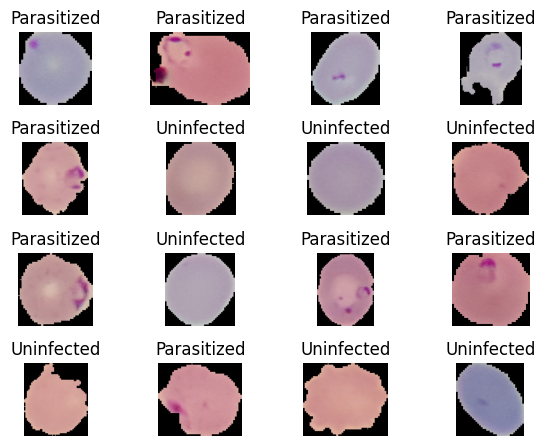

In [23]:
# Visualize the data

def get_label_str(label):
  if label == 0:
    return "Parasitized"
  else:
    return "Uninfected"



for i, sample in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4, 4, i+1)
  plt.imshow(sample['image'])
  plt.title(get_label_str(sample['label'].numpy()))
  plt.tight_layout()
  plt.axis('off')

## Data Processing

In [53]:
IM_SIZE = 224
BATCH_SIZE = 32

In [59]:
# Resize the image and rescale it
def resize_rescale(image, label):
    image = tf.image.resize(image, (IM_SIZE, IM_SIZE)) / 255.0
    return image, label

In [60]:
train_dataset = train_dataset.map(resize_rescale)\
                             .shuffle(buffer_size=8, reshuffle_each_iteration=True)\
                             .batch(BATCH_SIZE)\
                             .prefetch(tf.data.AUTOTUNE)

val_dataset = val_dataset.map(resize_rescale)\
                         .shuffle(buffer_size=8, reshuffle_each_iteration=True)\
                         .batch(BATCH_SIZE)\
                         .prefetch(tf.data.AUTOTUNE)

test_dataset = test_dataset.map(resize_rescale)\
                           .shuffle(buffer_size=8, reshuffle_each_iteration=True)\
                           .batch(BATCH_SIZE)\
                           .prefetch(tf.data.AUTOTUNE)


In [61]:
for image, label in train_dataset.take(1):
  print(image)
  print(label)

tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
 

## Model Creation

In [73]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(shape=(IM_SIZE, IM_SIZE, 3)),

    tf.keras.layers.Conv2D(filters=6, kernel_size=5, strides=1, padding='valid', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),

    tf.keras.layers.Conv2D(filters=16, kernel_size=5, strides=1, padding='valid', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [74]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 220, 220, 6)         │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 220, 220, 6)         │              24 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 110, 110, 6)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 106, 106, 16)        │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 106, 106, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 53, 53, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 44944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 100)                 │       4,494,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 10)                  │              40 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,498,921 (17.16 MB)

 Trainable params: 4,498,657 (17.16 MB)

 Non-trainable params: 264 (1.03 KB)

## Error sanctioning

In [75]:
# t_true = [0, 1, 0, 0]
# y_pred = [0, 0.99, 0.1, 0.2]

# bce = tf.keras.losses.BinaryCrossentropy()
# print(bce(t_true, y_pred))

In [76]:
# model.compile(
#     optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
#     loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     metrics = ['accuracy']
# )


model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.keras.losses.binary_crossentropy,
    metrics = ['accuracy']
)

In [77]:
history = model.fit(train_dataset,
                    validation_data = val_dataset,
                    epochs = 100,
                    verbose = 1)

Epoch 1/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.6747 - loss: 0.6130 - val_accuracy: 0.8610 - val_loss: 0.3895
Epoch 2/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9264 - loss: 0.2183 - val_accuracy: 0.9155 - val_loss: 0.2547
Epoch 3/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9381 - loss: 0.1867 - val_accuracy: 0.7678 - val_loss: 0.4220
Epoch 4/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9473 - loss: 0.1603 - val_accuracy: 0.8763 - val_loss: 0.4077
Epoch 5/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9535 - loss: 0.1460 - val_accuracy: 0.7115 - val_loss: 0.5667
Epoch 6/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9562 - loss: 0.1325 - val_accuracy: 0.8113 - val_loss: 0.3706
Epoch 7/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9620 - loss: 0.1139 - val_accuracy: 0.8596 - val_loss: 0.3728
Epoch 8/100
689/689 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9664 - loss: 0.1006 -

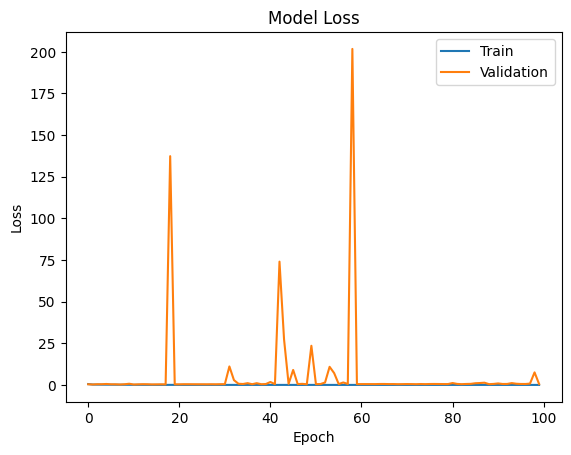

In [78]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'upper right')
plt.show()

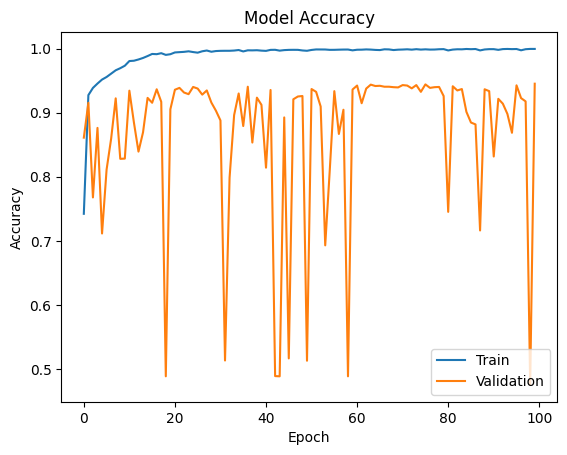

In [79]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc = 'lower right')
plt.show()

In [80]:
model.evaluate(test_dataset)

87/87 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9519 - loss: 0.4198


[0.4340987801551819, 0.9510159492492676]

In [89]:
def parasite_or_not(x):
  if x < 0.5:
    return str('Parasite')
  else:
    return str('Uninfected')

In [90]:
parasite_or_not(model.predict(test_dataset.take(1))[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


'Parasite'

## Saving and loading the model

In [96]:
model.save('lenetSavedModel.h5')